In [99]:
# Preliminaries
SRC_PATH = '../../src/'
DATA_PATH = '../../Rwanda/raw_data/'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from IPython.display import Image
import os,sys

sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import COLOR_SCHEME, TIER_COLORS

# load data
main = pd.read_excel(DATA_PATH + '/main.xlsx')

section_L = pd.read_csv(DATA_PATH + '/csv/L.csv')

# important variables
n_households = len(main)
provinces = np.unique(main['Province'])

main_source_question = 'C182_which is the source that you use most of the time'
source_labels = [1,2,3,4,6,7,8]
source_names = ["National Grid",
                "Local Mini Grid",
                "Generator","Solar Home System","Rechargeable Battery","Pico-Hydro","No electricity"]



# The Multi-tier framework for measuring energy access



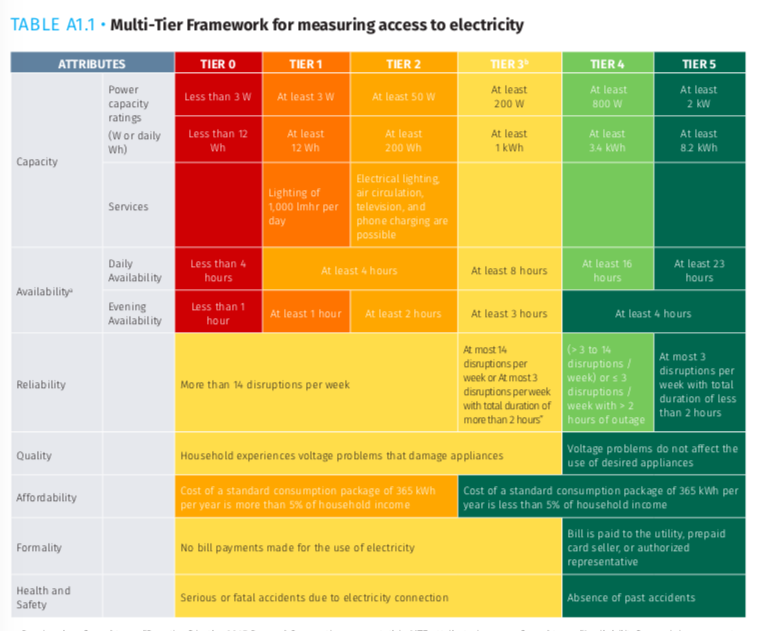

In [2]:
Image('../images/MTF_electricity.png')

## Health & Safety

We consider the question: **In the last 12 months, did any household members die or have permanent limb (bodily injury) damage because of the electricity ?**

##### Type of electicity  and its related security question:

- 1- Electricity from National Grid C41
- 2- Electricity from Mini Grid C83
- 3- Electric geneator set C112
- 4- Rechargeable Battery C130
- 5- Pico-Hydro C142
- 6- Solar device C175


* 7- Lamp/Candle (with fuel and not electricity) ? In the last 12 months, what type of harm/injury did any household members have from [LAMP/ CANDLE]? F14





In [3]:
# Question related to safety/ injuries/damages during a typical month 
question_safety = {
    "National Grid": 'C41_household member died or damaged because of electricity',
    "Local Mini Grid": 'C83_household members die or injured because of the grid electricity',
    "Generator": 'C112_household members died or injured because of the generator',
    "Solar Home System": 'C175_household members died or  injured because of the DEVICE',
    "Rechargeable Battery":'C130_household members died  injured because of the rechargeable batteries',
    "Pico-Hydro": 'C142_household members died injured because of the pico-hydro system'
}

## Availability 

We consider the questions of type:
- **How many hours of electricity are available each day and night from the grid? (max 24 hours)**
- **How many hours of electricity are available each evening, from 6:00 pm to 10:00 pm from the grid?(max 4 hours)**

Note that each households only answers depending on the main electricity source.


In [4]:
# Questions related to availability during a typical month

question_availability = {
    
    "National Grid": {
        'day': 'C26b_hours of electricity availability each day and night (Typical Months)',
        'night': 'C27b_hours electricity is available each evening (Typical Month)'
    },
    
    "Local Mini Grid": {
        'day': 'C68b_hours of electricity availability each day and night (Typical Months)',
        'night': 'C69b_hours of electricity availability each evening (Typical Months)',
    },
    
    "Generator": {
        'day': 'C107b_hours could you use this generator each day and night  (Typical Months)',
        'night': 'C108b_hours could you use this generator each evening (Typical Months)'
    },
    
    "Solar Home System": {
        'day': 'C172b_hours you receive service from this DEVICE each day and night (Typical Months)',
        'night': 'C173b_C173a_hours is service available from this DEVICE each evening (Typical Months)'
    },
    
    "Pico-Hydro":{
        'day': 'C137b_hours you could use this pico-hydro system each day and night (Typical Months)',
        'night': 'C138b_hours you could use this pico-hydro system each evening (Typical Months)'
    } 
}


In [166]:
E_safety_tier = []
E_Availability_tier_daily = []
E_Availability_tier_evening = []

for index,row in main.iterrows():
    
    # We first compute the relevant value depending on the main source, then we
    # check the corresponding tier (this second part can be done source-independently)
    if row[main_source_question]==1:
        injury = row[question_safety["National Grid"]]
        h_day = row[question_availability["National Grid"]["day"]]
        h_evening = row[question_availability["National Grid"]["night"]]
        
    elif row[main_source_question]==2:
        injury = row[question_safety["Local Mini Grid"]]
        h_day = row[question_availability["Local Mini Grid"]["day"]]
        h_evening = row[question_availability["Local Mini Grid"]["night"]]
        
    elif row[main_source_question]==3:
        injury = row[question_safety["Generator"]]
        h_day = row[question_availability["Generator"]["day"]]
        h_evening = row[question_availability["Generator"]["night"]]
        
    elif row[main_source_question] == 4 or row[main_source_question] == 5:
        injury = row[question_safety["Solar Home System"]]
        h_day = row[question_availability["Solar Home System"]["day"]]
        h_evening = row[question_availability["Solar Home System"]["night"]]
        
    elif row[main_source_question] == 6:
        injury = row[question_safety["Rechargeable Battery"]]
        h_day = np.nan #row[question_availability["Rechargeable Battery"]["day"]]
        h_evening = np.nan #row[question_availability["Rechargeable Battery"]["night"]]
        
    elif row[main_source_question] == 7:
        injury = row[question_safety["Pico-Hydro"]]
        h_day = row[question_availability["Pico-Hydro"]["day"]]
        h_evening = row[question_availability["Pico-Hydro"]["night"]]
    
    else:
        injury = np.nan
        h_day = np.nan
        h_evening = np.nan
        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # SAFETY
    if injury==1:
        E_safety_tier.append(3)
    elif injury==2:
        E_safety_tier.append(5)
    else:
        E_safety_tier.append(np.nan)
    
    # AVAILABILITY
    if h_day < 4:
        E_Availability_tier_daily.append(0)
    elif h_day < 8:
        E_Availability_tier_daily.append(2)
    elif h_day < 16:
        E_Availability_tier_daily.append(3)
    elif h_day < 23:
        E_Availability_tier_daily.append(4)
    elif h_day >= 23:
        E_Availability_tier_daily.append(5)
    else:
        E_Availability_tier_daily.append(np.nan)
    
    if h_evening < 1:
        E_Availability_tier_evening.append(0)
    elif h_evening < 2:
        E_Availability_tier_evening.append(1)
    elif h_evening < 3:
        E_Availability_tier_evening.append(2)
    elif h_evening < 4:
        E_Availability_tier_evening.append(3)
    elif h_evening >= 4:
        E_Availability_tier_evening.append(5)
    else:
        E_Availability_tier_evening.append(np.nan)
        
main['E_Safety'] = E_safety_tier
main['E_Availability_day'] = E_Availability_tier_daily 
main['E_Availability_night'] = E_Availability_tier_evening
main['E_Availability'] = min(E_Availability_tier_daily,E_Availability_tier_evening)

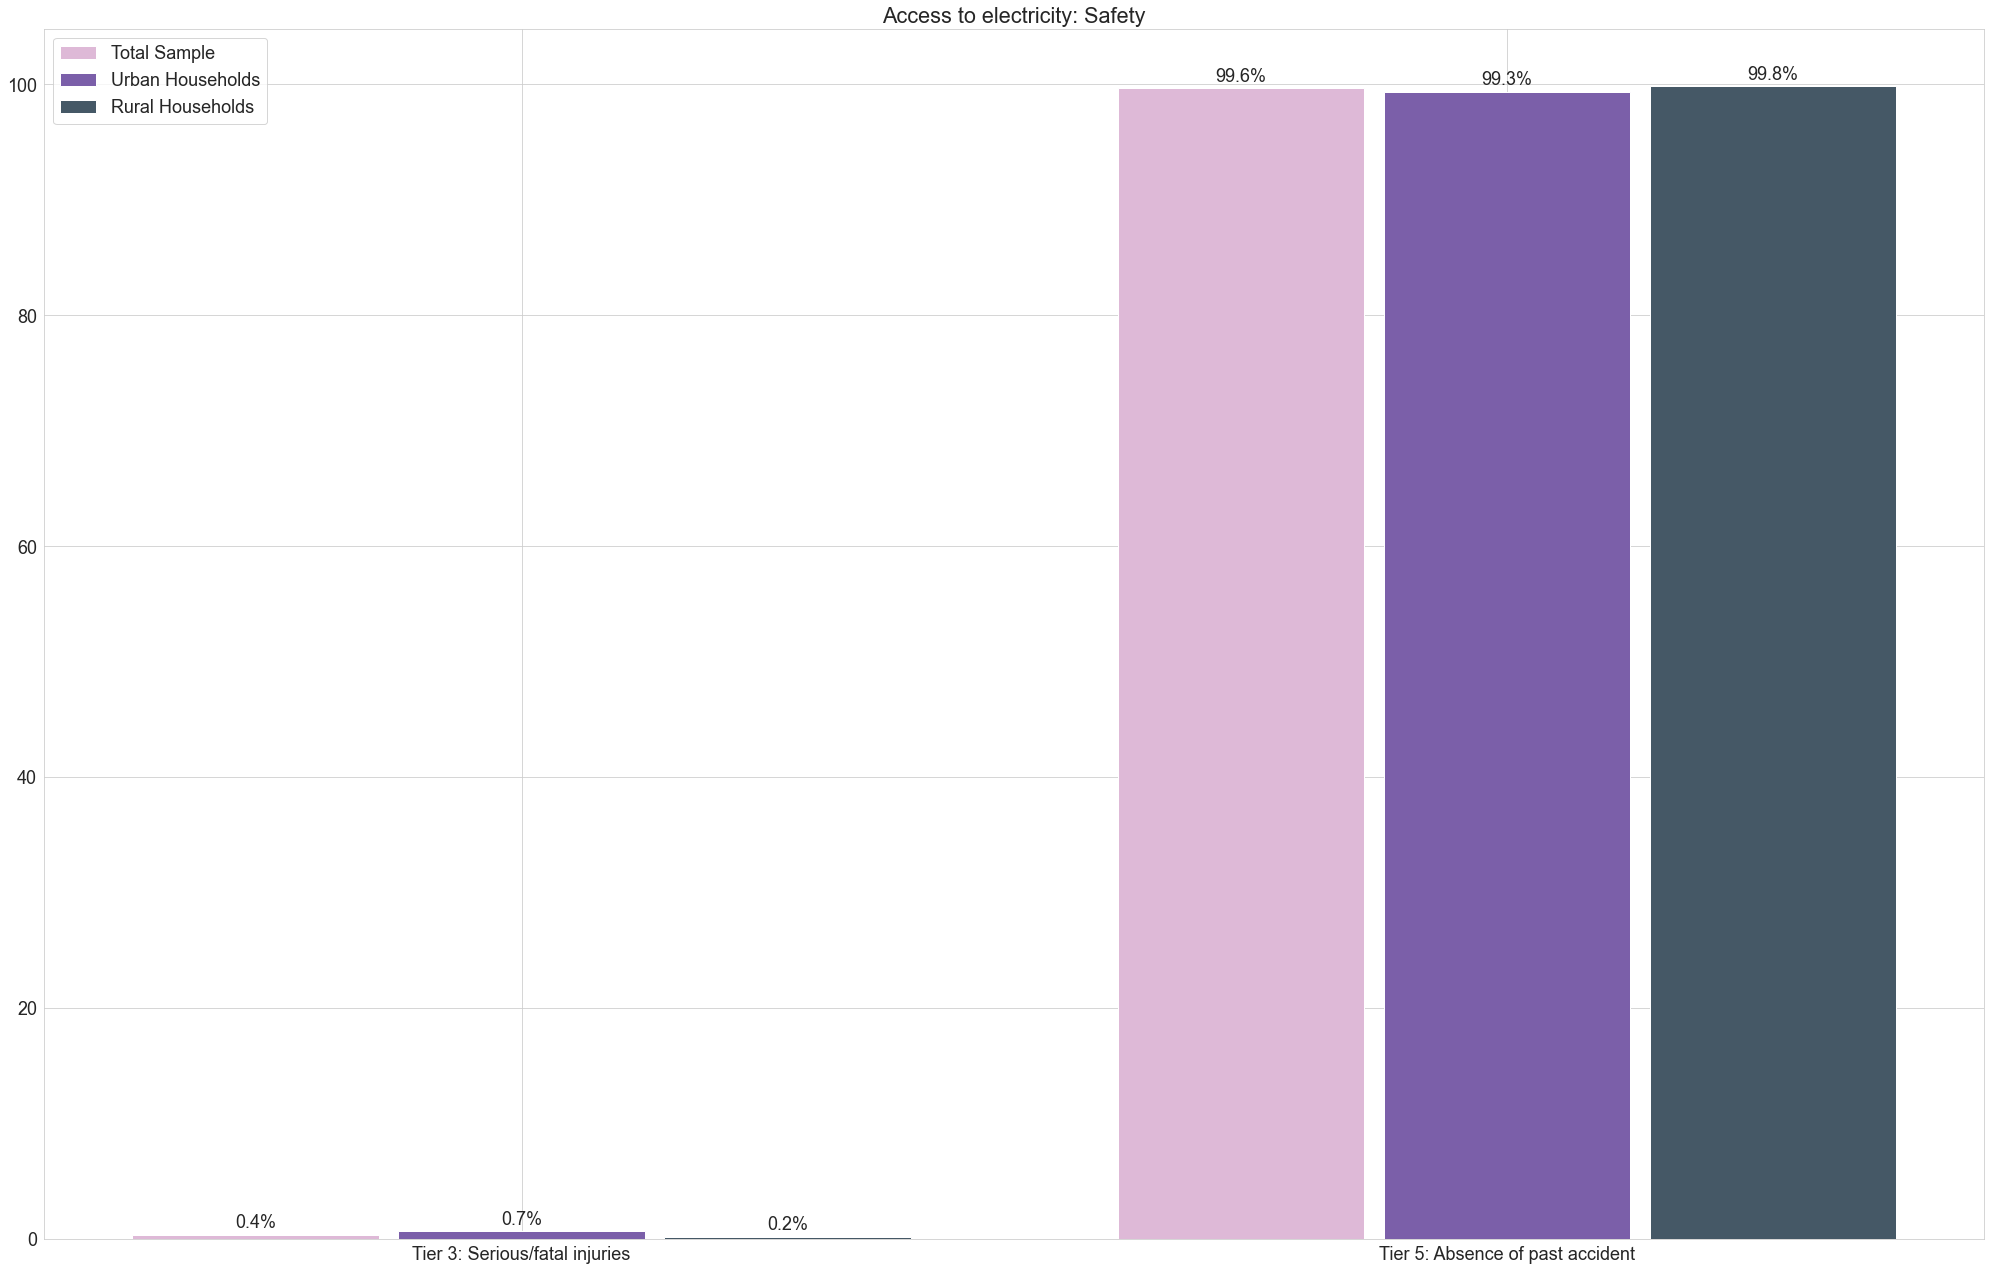

In [167]:
plot_tier_distribution(main,'E_Safety',values=[3,5],
                       labels= ['Tier 3: Serious/fatal injuries', 'Tier 5: Absence of past accident'],
                       title='Access to electricity: Safety')


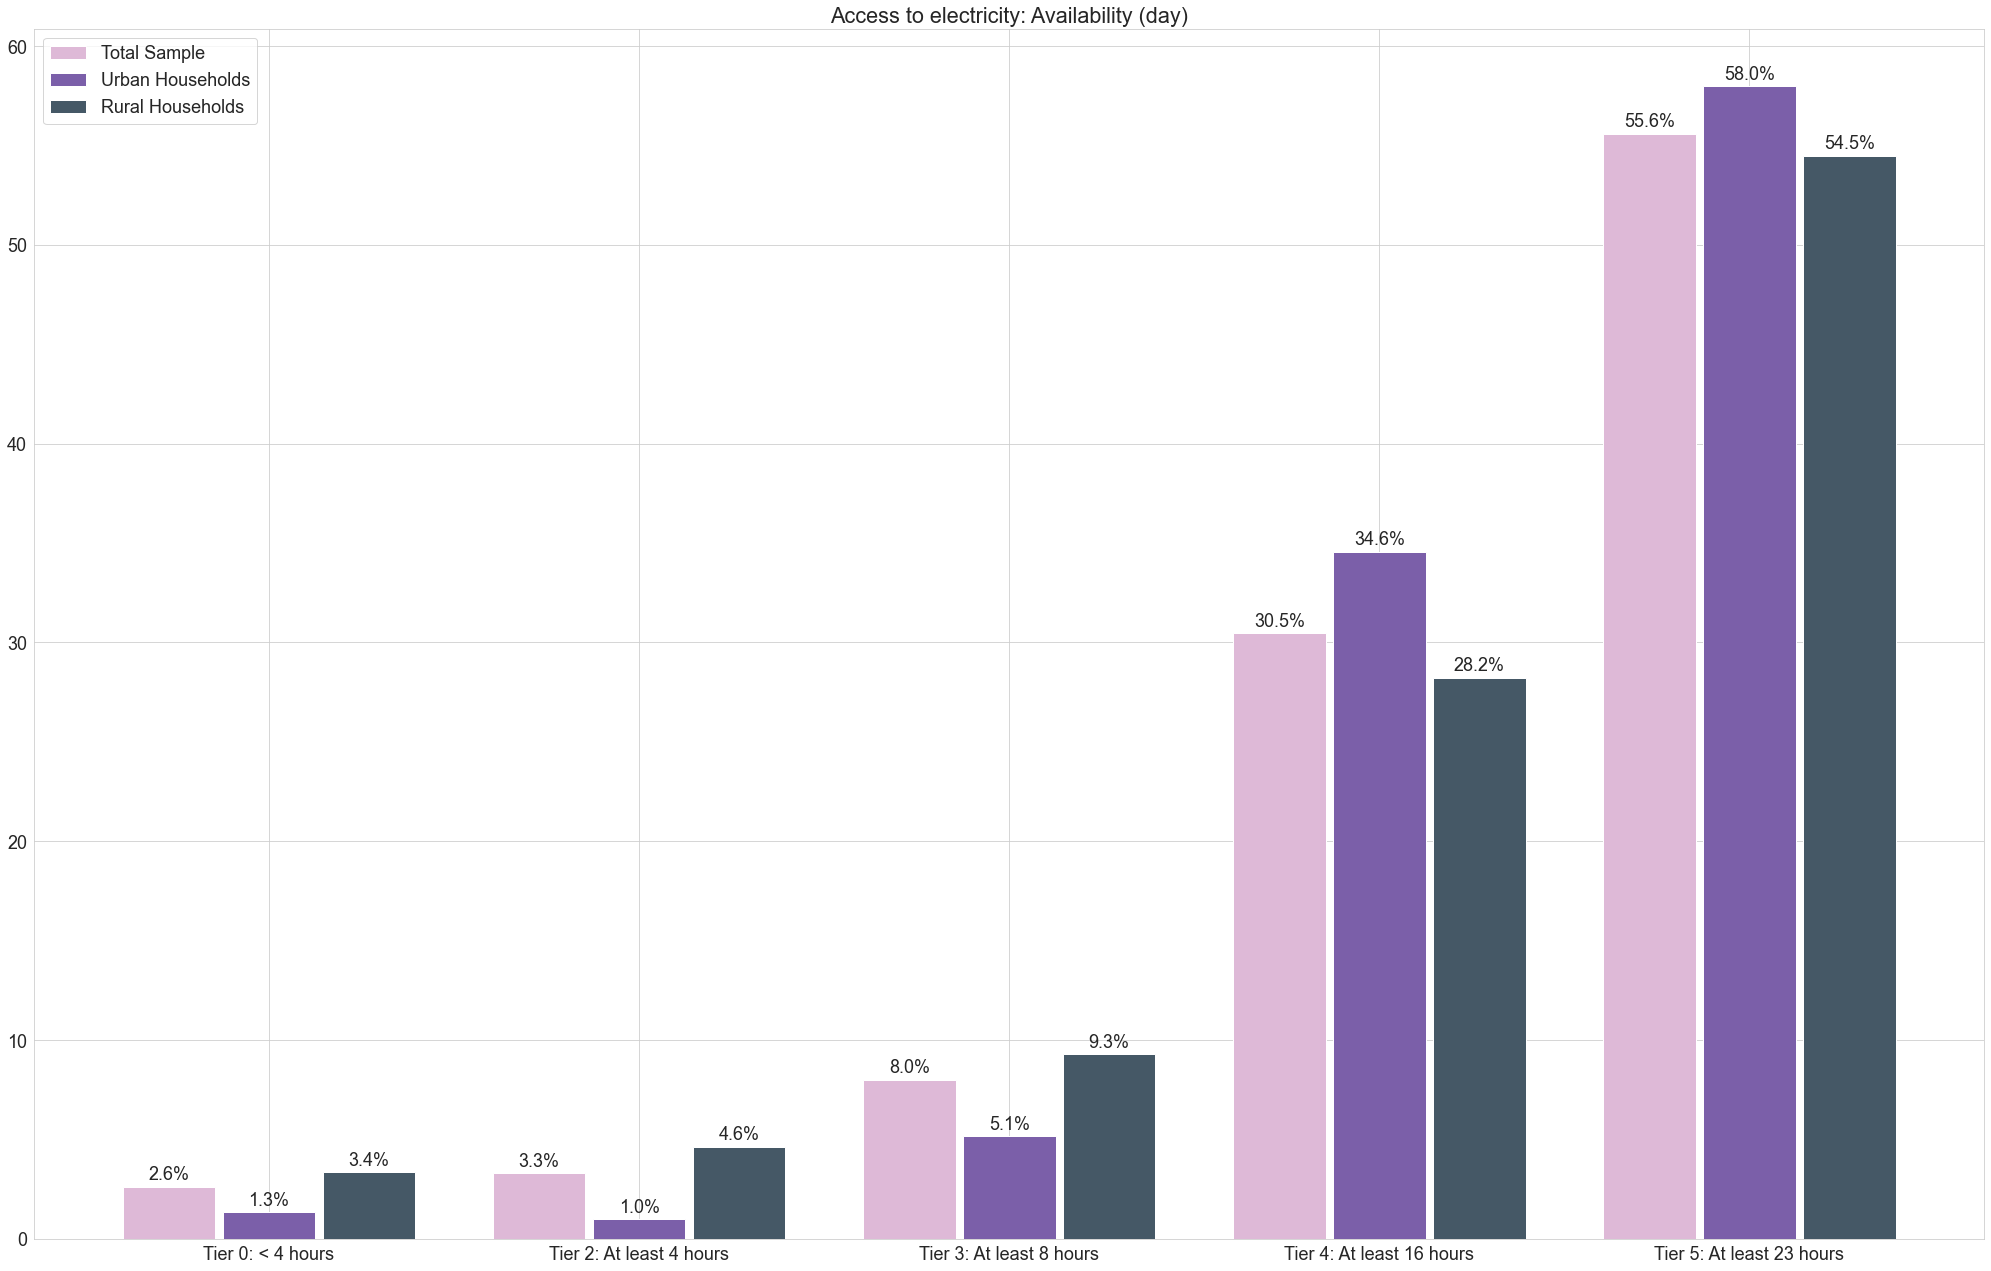

In [168]:
plot_tier_distribution(main,'E_Availability_day',values= [0,2,3,4,5],
                       labels= ['Tier 0: < 4 hours', 'Tier 2: At least 4 hours', 'Tier 3: At least 8 hours', 'Tier 4: At least 16 hours','Tier 5: At least 23 hours' ],
                       title='Access to electricity: Availability (day)')


### Comments:

The results are quite close to the MTF report:

**MTF report:**
- Nationwide: 5.9% - 7.0% - 10.1%- 27.5 % - 49.6%
- Urban: 1.4% - 2.7% - 8.4.1%- 30.7 % - 56.8%


**Our analysis:**
- Nationwide: 2.6% - 3.3% - 8.1% - 30.4% - 55.6%
- Urban: 1.3% - 1.0% - 5.1% - 34.6% - 58.0%

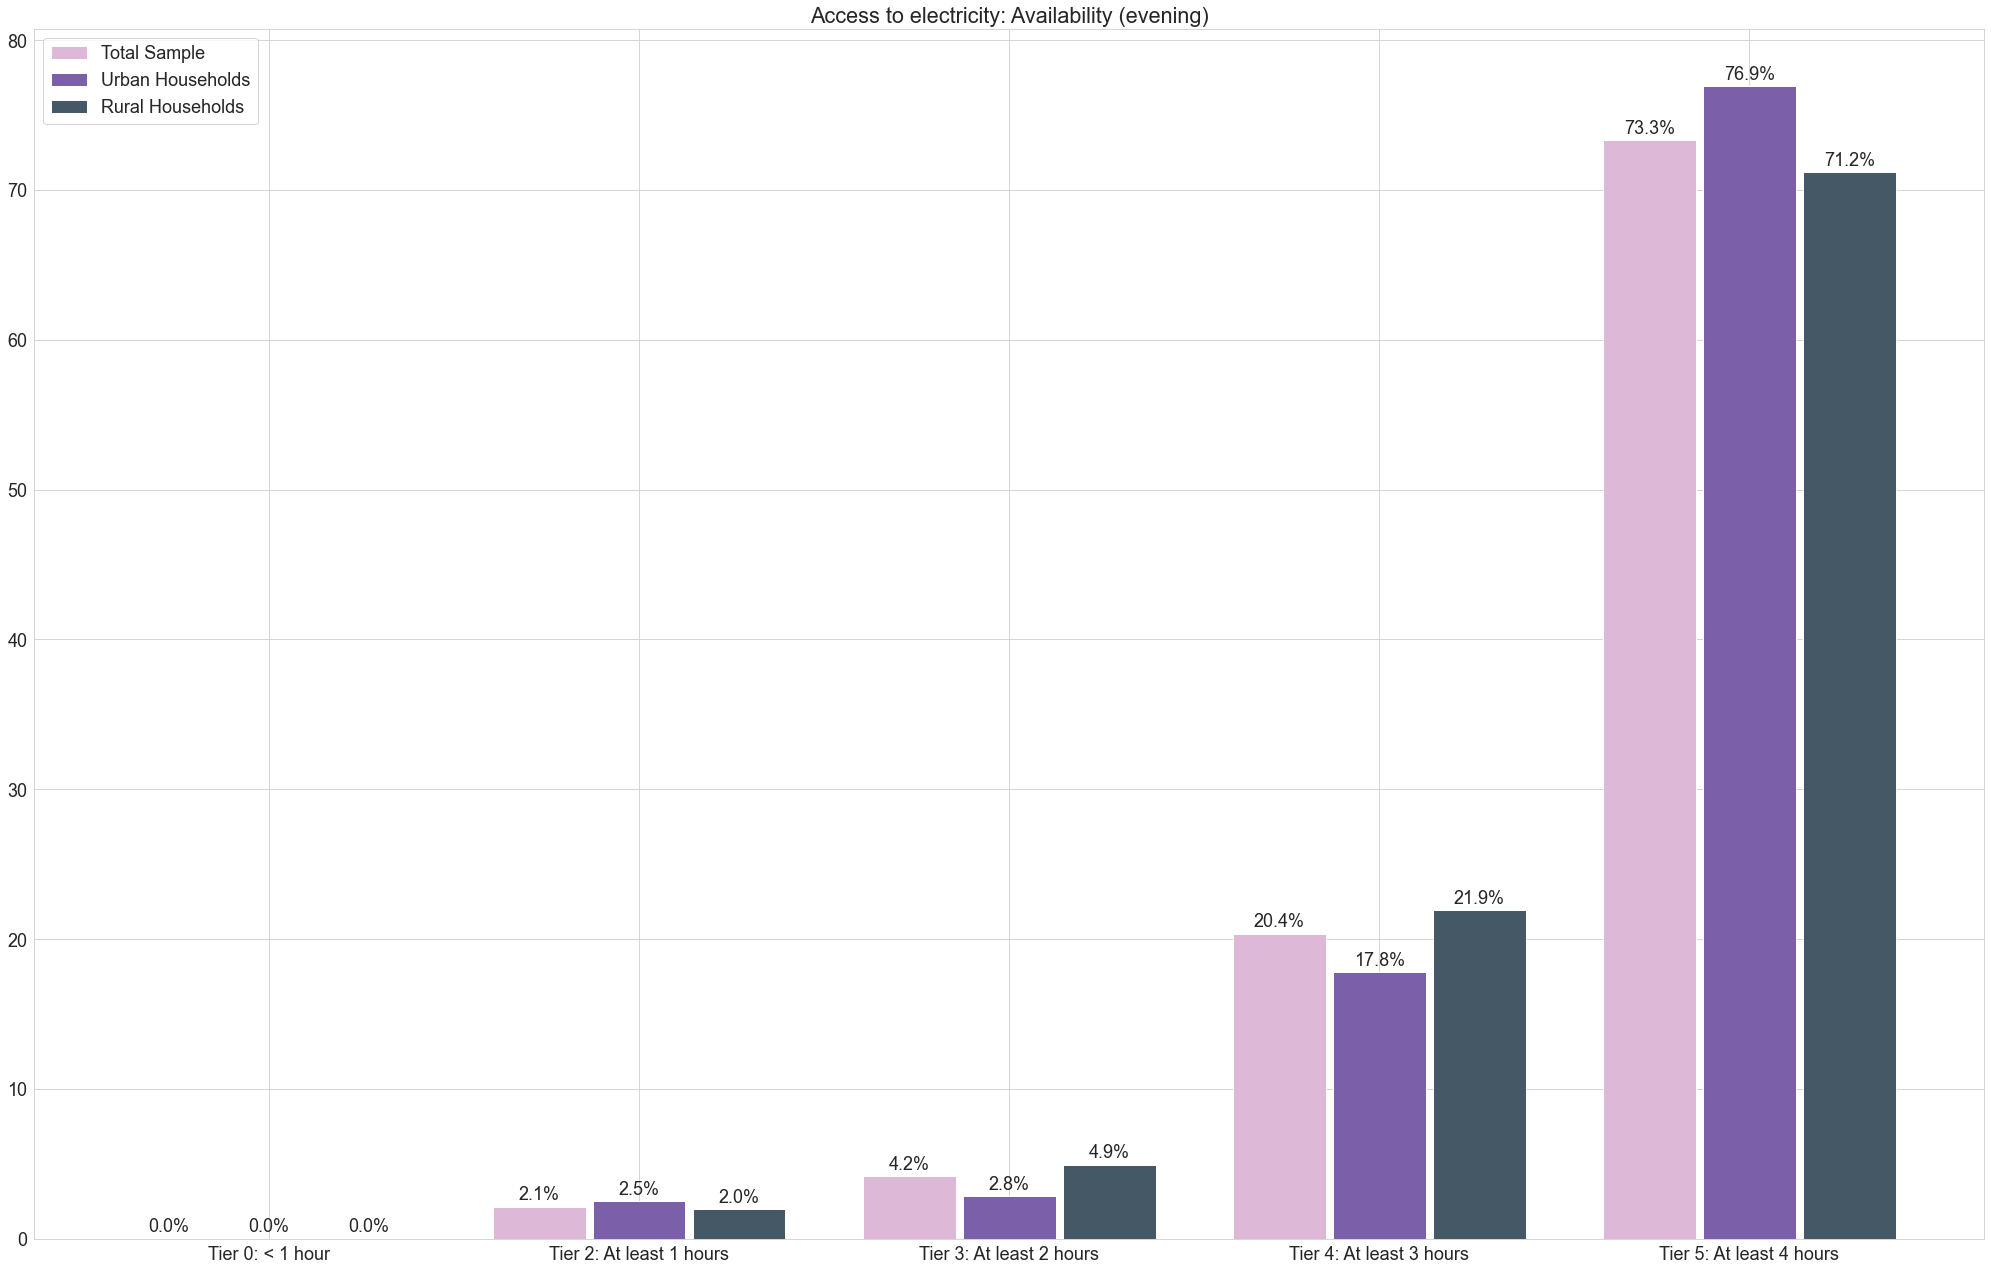

In [169]:
plot_tier_distribution(main,'E_Availability_night',values= [0,1,2,3,5],
                       labels= ['Tier 0: < 1 hour','Tier 2: At least 1 hours', 'Tier 3: At least 2 hours', 'Tier 4: At least 3 hours','Tier 5: At least 4 hours' ],
                       title='Access to electricity: Availability (evening)')

### Comments:

The results are in line with those from the MTF report:

**MTF report:**
- Nationwide: 3.1% - 3.7% - 21.3%- 71.9%
- Urban: 1.2% - 2.1% - 20.7 % - 76.0%

**Here:**

- Nationwide: 2.1% - 4.2% - 20.4% - 73.3% 
- Urban: 2.5% - 2.8% - 17.8% - 76.9%



## Reliability

We consider the questions of type:
- **In a typical day, how many outages/blackouts of the [electric source] happen ?**
- **In a typical day and night (24 hours), what was the total duration of all the outages/blackouts?**

Note that each households only answers depending on the main electricity source.


In [170]:
# Questions related to reliability during a typical month

question_reliability = {
    "National Grid":
        {'outages':"C29b_how many outages/blackouts of the grid happen (Typical Months)",
         'duration': "C30b_what was the total duration of all the outages/blackouts (Typical Months)"},
    
    "Local Mini Grid":
        {'outages':"C71b_outages/blackouts of the mini-grid (Typical Months)",
         'duration': "C72b_total duration of all the outages/blackouts (Typical Months)"},

}


In [171]:
E_Reliability_tier = []

for index,row in main.iterrows():
    
    if row[main_source_question]==1:
        n_outages = row[question_reliability["National Grid"]["outages"]]
        total_duration = row[question_reliability["National Grid"]["duration"]]
        
    elif row[main_source_question]==2:
        n_outages = row[question_reliability["Local Mini Grid"]['outages']]
        total_duration = row[question_reliability["Local Mini Grid"]["duration"]]
    
    else:
        n_outages = np.nan
        total_duration = np.nan
        
        
    # try to fix the mix between minutes and hours in the answer:
    # if the answer is > 24, then we assume they gave minutes
    if total_duration>24:
        total_duration = total_duration/60
        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # number of interruptions 
    if n_outages <= 3:
        if total_duration < 2:
            E_Reliability_tier.append(5)
        else:
            E_Reliability_tier.append(4)
    
    elif n_outages <= 14:
        E_Reliability_tier.append(4)

    elif n_outages > 14:
        E_Reliability_tier.append(3)   
    
    else:
        E_Reliability_tier.append(np.nan)
    
main['E_Reliability'] = E_Reliability_tier



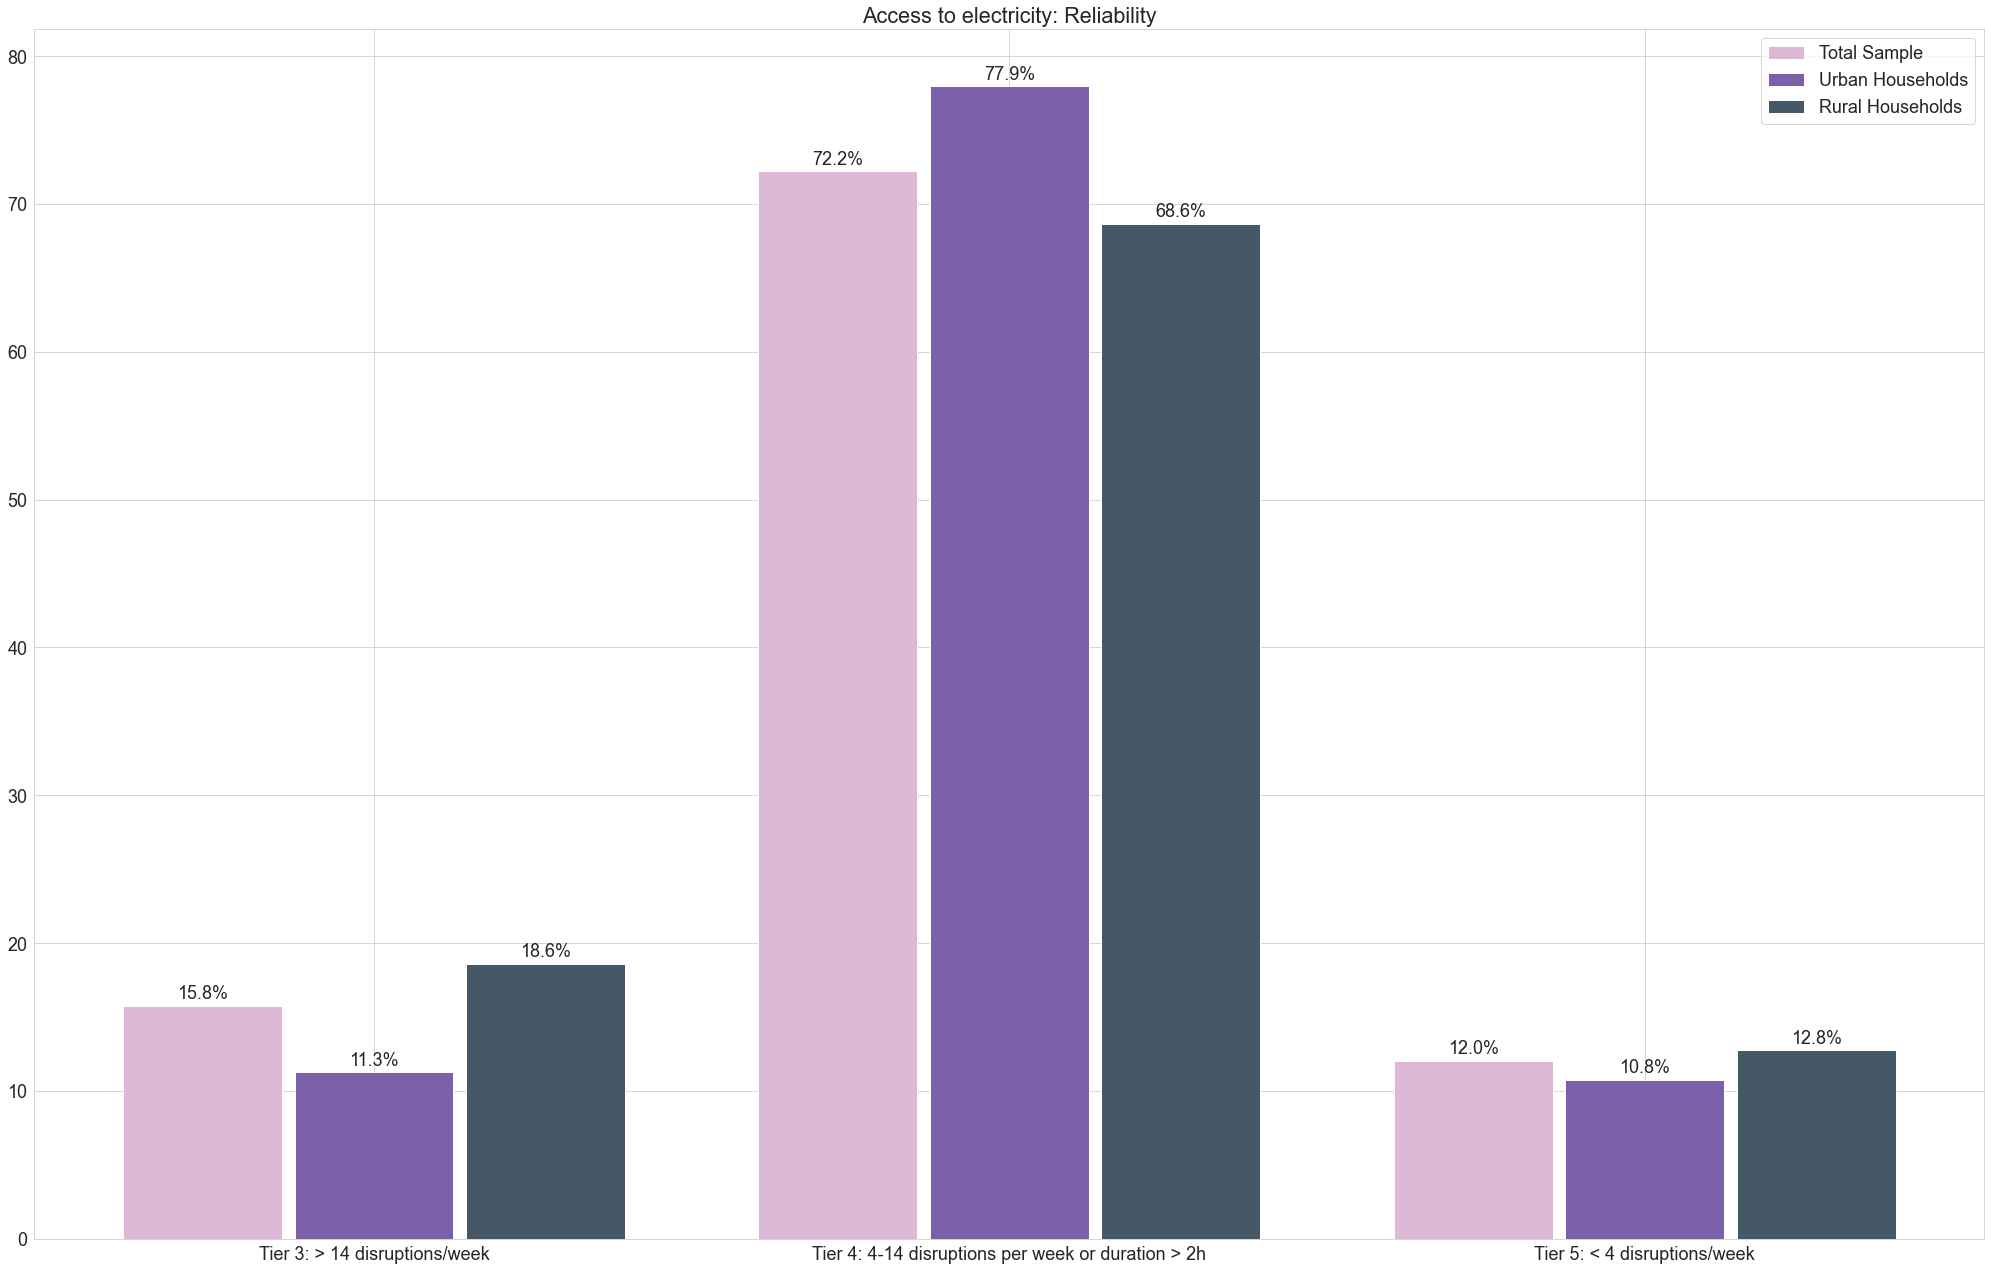

In [172]:
plot_tier_distribution(main,'E_Reliability',values= [3,4,5],
                       labels=['Tier 3: > 14 disruptions/week', 'Tier 4: 4-14 disruptions per week or duration > 2h', 'Tier 5: < 4 disruptions/week' ],
                       title='Access to electricity: Reliability')

## Formality

We consider the question of type:
- **How are you billed for electricity?**

Note that each households only answers depending on the main electricity source.


In [173]:
# There are two relevant questions: Whom the HH pays, and how the HH is billded 

question_formality_billing = {
    
    "National Grid": {
        "question": 'C17_How are you billed for electricity',
        "answers": {
            "1": "Cash power",
            "2": "Monthly bill (post paid)",
            "3": "Fixed monthly fee",
            "4": "Pay based on lights and appliances used",
            "5": "Utility estimates consumption",
            "6": "At the time of connection",
            "555": "Other",
            "111": "No bill for electricity"
        },
        "values": []
    },
    
    "Local Mini Grid": {
        "question": "C57_How are you billed for electricity",  
        "answers": {
             "1": "Fixed monthly fee",
            "2": "Pay based on lights and appliances used",
            "3": "Utility estimates consumption",
            "555": "Other",
            "111": "No bill for electricity"
        },
        "values": []
    }
}

                      
question_formality_payment = {
    
    "National Grid": {
        "question": "C11_Who do you currently pay for your electricity service",
        "answers": {
            "1": "Pre-paid meter card seller",
            "2": "Community/village/municipality",
            "3": "Relative",
            "4": "Neighbor",
            "5": "Landlord",
            "6": "No one/for free",
            "7": "EUCL",
            "555": "Other"
        },
        "values":[]
    },
    
    "Local Mini Grid": {
        "question": "C52_Who do you currently pay for your electricity service",
        "answers": {
            "1": "Energy Company",
            "2": "Pre-paid meter card seller",
            "3": "Community/village/municipality",
            "4": "Landlord",
            "7": "No one/for free",
            "555": "Other"
        },
        "values": []
    }
}

 


In [174]:
E_Formality = []
for index,row in main.iterrows():
    
    if row[main_source_question]==1:
        billing = row[question_formality_billing["National Grid"]["question"]]      
        no_payment = row[question_formality_payment["National Grid"]["question"]]==6
        
    
    elif row[main_source_question]==2:
        billing = row[question_formality_billing["Local Mini Grid"]["question"]]
        no_payment = row[question_formality_payment["Local Mini Grid"]["question"]]==7    
        
    
    else:
        billing = np.nan
        no_payment = np.nan

        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # no bill or "other"
    if billing == 111 or billing == 555:
        E_Formality.append(3)   
    #
    elif not(billing == np.nan):
        E_Formality.append(5)   
    #
    else:
        E_Formality.append(np.nan)
    
    # for free
    #if no_payment==True:
    #    E_Formality.append(3) 

    
    #elif no_payment==False:
    #    E_Formality.append(5)   
    
    #else:
    #    E_Formality.append(np.nan)
    
    
main['E_Formality'] = E_Formality

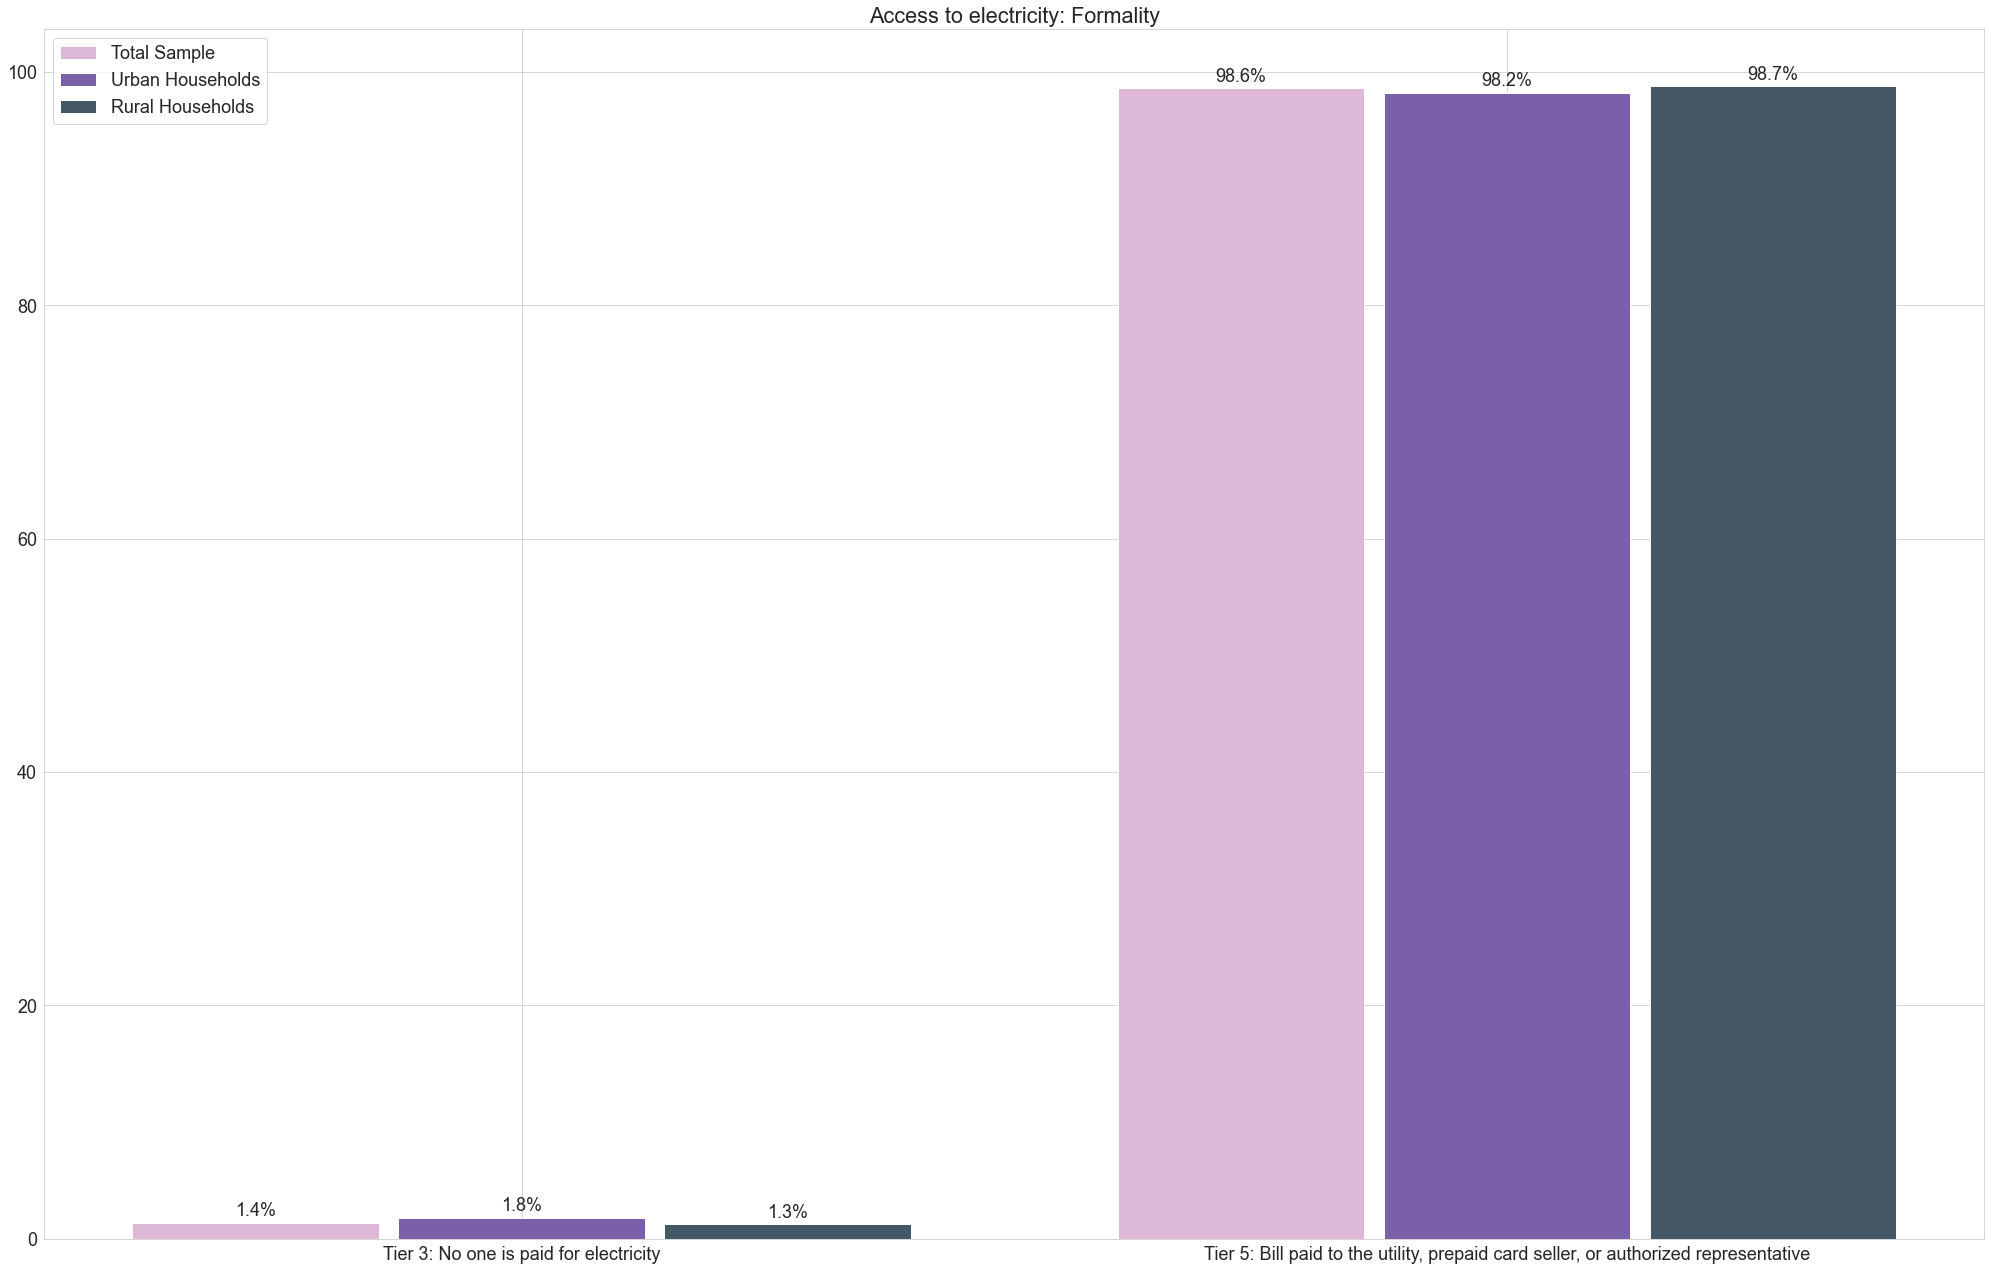

In [175]:
plot_tier_distribution(main,'E_Formality',values= [3,5],
                       labels = ['Tier 3: No one is paid for electricity', 
                                 'Tier 5: Bill paid to the utility, prepaid card seller, or authorized representative' ],
                       title='Access to electricity: Formality')

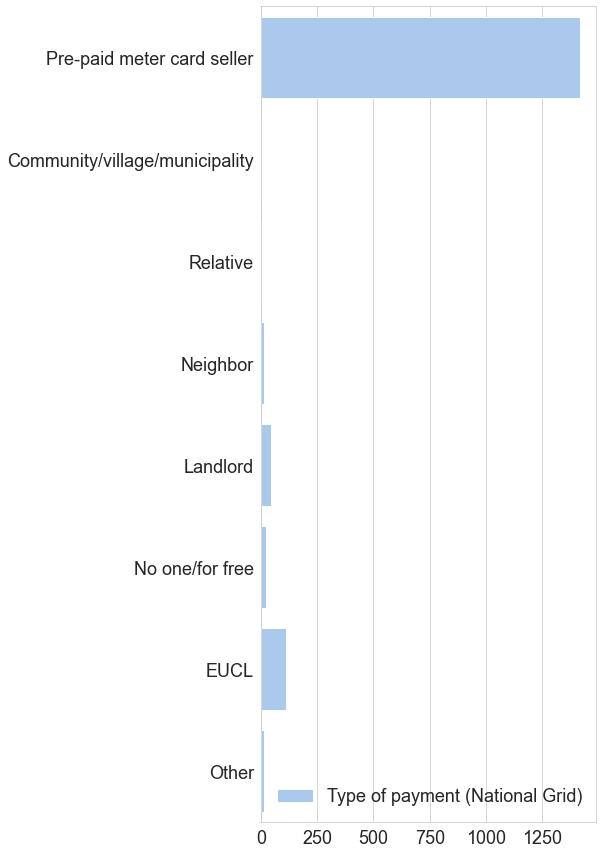

In [176]:
# some more insights on billing and payment types
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")



labels = []
q = question_formality_payment["National Grid"]["question"]
question_formality_payment["National Grid"]["values"] = []
for i in question_formality_payment["National Grid"]["answers"].keys():
    question_formality_payment["National Grid"]["values"].append(len(main.loc[main[q]== int(i)]) )
    labels.append(question_formality_payment["National Grid"]["answers"][i])
    

data = pd.DataFrame.from_dict({"total": question_formality_payment["National Grid"]["values"],
                               "types":labels})
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x=question_formality_payment["National Grid"]["values"], y=labels, data=data,
            label="Type of payment (National Grid)", color="b")
ax.legend(ncol=2, frameon=False)
plt.show()


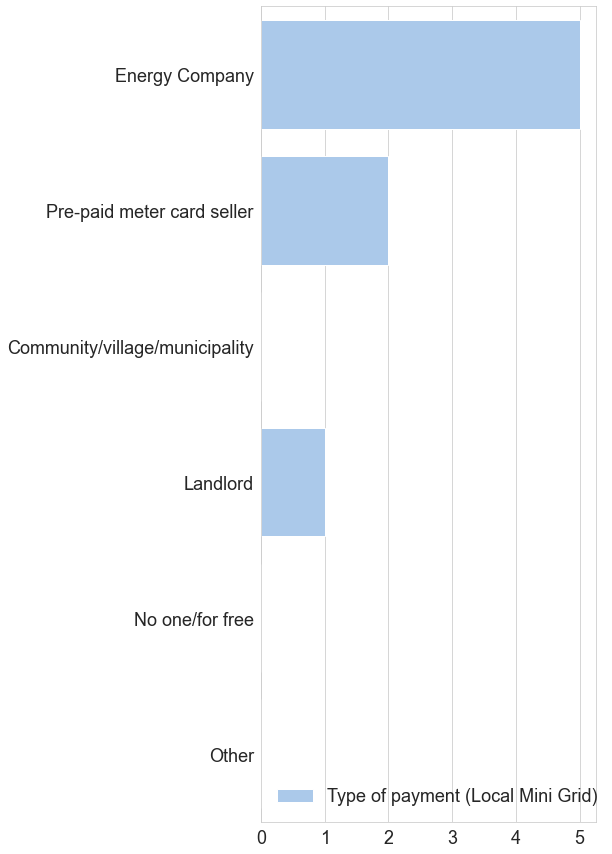

In [177]:
q = question_formality_payment["Local Mini Grid"]["question"]
labels = []
question_formality_payment["Local Mini Grid"]["values"] = []
for i in question_formality_payment["Local Mini Grid"]["answers"].keys():
    question_formality_payment["Local Mini Grid"]["values"].append(len(main.loc[main[q]== int(i)]) )
    labels.append(question_formality_payment["Local Mini Grid"]["answers"][i])

data = pd.DataFrame.from_dict({"total": question_formality_payment["Local Mini Grid"]["values"],
                               "types":labels})
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x=question_formality_payment["Local Mini Grid"]["values"], y=labels, data=data,
            label="Type of payment (Local Mini Grid)", color="b")
ax.legend(ncol=2, frameon=False)
plt.show()

## Quality

We consider the question of type:
- **In the last 12 months, did any of your appliances get damaged because the voltage was going up and down from the grid?**

Note that each households only answers depending on the main electricity source.

In [178]:
question_quality = {
    "National Grid": 'C39_any appliance got damaged because the voltage was going up',
    "Local Mini Grid":"C81_appliances get damaged because the voltage was going up and down",    
    "Generator": 'C110_appliances got damaged because the voltage was going up and down',
    "Pico-Hydro": 'C140_appliances got damaged because the voltage was going up and down'  
}

In [179]:
E_Quality = []

for index,row in main.iterrows():
    
    if row[main_source_question] == 1:
        quality = row[question_quality["National Grid"]]      
    elif row[main_source_question] == 2:
        quality = row[question_quality["Local Mini Grid"]]
    elif row[main_source_question] == 3:
        quality = row[question_quality["Generator"]]
    elif row[main_source_question] == 7:
        quality = row[question_quality["Pico-Hydro"]]
    else:
        quality = np.nan

        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # Applicances got damaged or not 
    
    if quality == 1:
        E_Quality.append(3)   
    
    elif quality == 2:
        E_Quality.append(5)   
    
    else:
        E_Quality.append(np.nan)
    
main['E_Quality'] = E_Quality

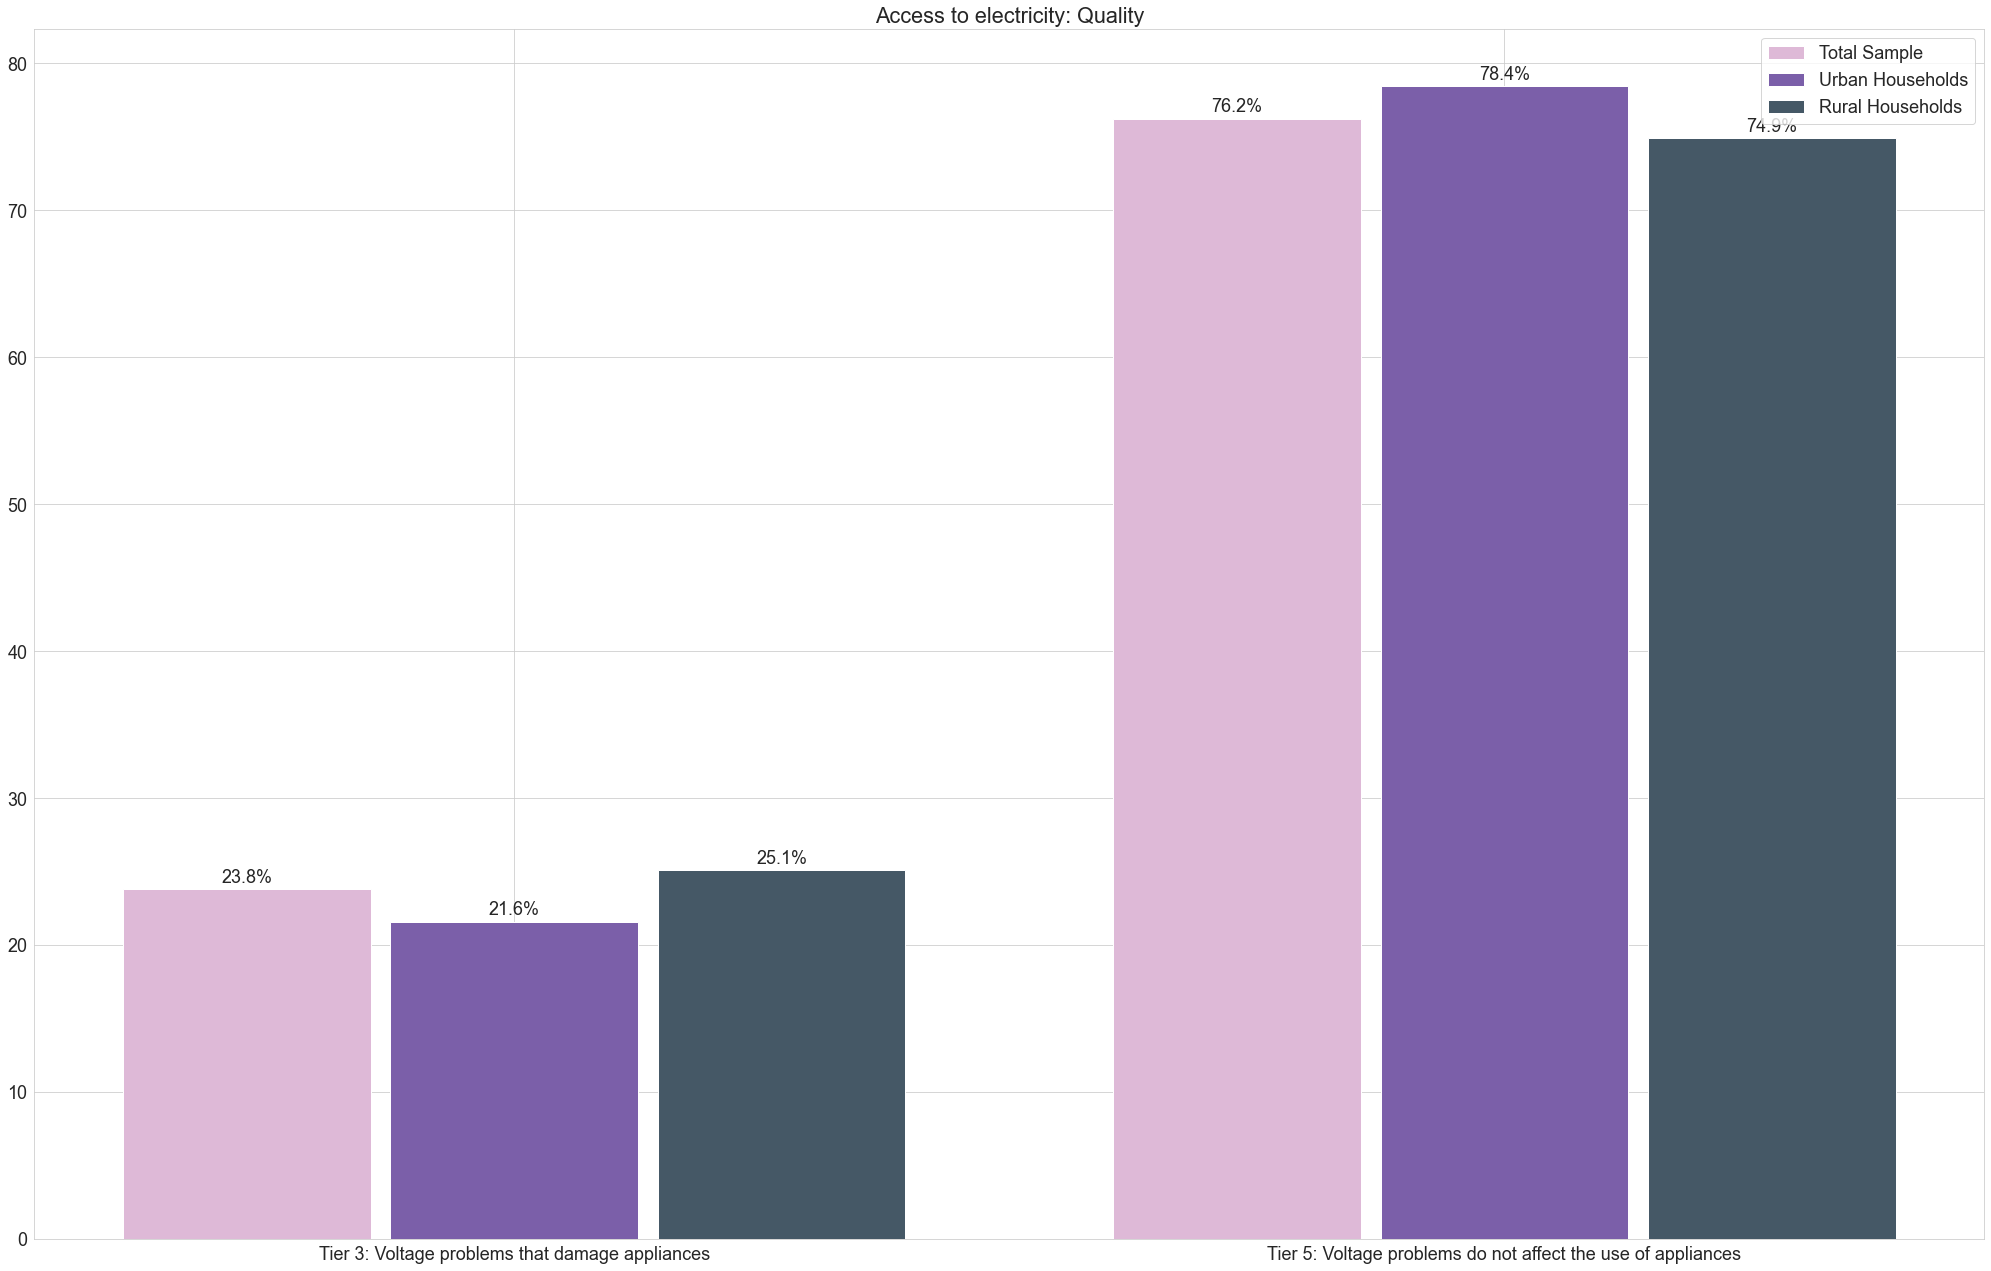

In [180]:
plot_tier_distribution(main,'E_Quality',values= [3,5],
                       labels = ['Tier 3: Voltage problems that damage appliances', 'Tier 5: Voltage problems do not affect the use of appliances' ],
                       title='Access to electricity: Quality')



### Comments:

The results are in line with those from the MTF report:

**MTF report:**
- Nationwide: 20.9% - 79.1% 
- Urban: 19.7% - 80.3% 
- Rural: 22.6% - 77.4%

**Here:**

- Nationwide: 23.8% - 76.2%
- Urban: 21.6% - 78.4%
- Rural: 25.1% - 74.9%



## Capacity

This attributes concerns the question **What appliances can I power?**

Since power and voltage estimations are not trivial (and might require knowledge that is not available, for example if the respondent does not know the technical details of the connection/device), different estimation approaches and
hypotheses have been used:

- If the HH is connected to national grid: It is assumed that it has the maximum capacity (tier 5), see page 16 of the report:
```
"Because grid-connected households are considered to receive high-capacity electricity (over 2,000 W), the proportion of households that receive high-capacity electricity is the same as the proportion of households that are connected to the grid (23.5%). While 75.8% of urban households receive high- capacity electricity, only 12% of rural households do, because penetration of off-grid solutions that provide limited capacity is higher in rural areas (figure 13)."
```

- For solar devices, a simplified methodology has been used to approximate off-grid access based on survey results (since survey data lack details on system sizes and performance).  The following has been used:

    - **Solar lantern**: Powers a single light bulb and allows only part of the household to be classified in Tier 1. Under the MTF methodology the number of household members in Tier 1 is based on the light output (lumen-hours)
and phone charging capability of the solar lantern. Because the survey could not gather precise information
on these service outputs, this report uses a simplified methodology. For a household that owns one solar
lantern without phone charging capability, it is assumed that 20% of the household members are in Tier 1;
for a household that owns one solar lantern with phone charging capability, it is assumed that 60% of the
household members are in Tier 1.

    - **Solar lighting system (SLS)**. Powers two or more light bulbs and allows part or all of the household to be
classified in Tier 1. For a household that uses an SLS without phone charging capability, it is assumed that
70% of the household members are in Tier 1; for a household that uses an SLS with phone charging capability,
it is assumed that all the household members are in Tier 1.

    - **Solar home system (SHS)**. Powers two or more light bulbs and appliances such as a television, iron, microwave,
or refrigerator. For a household that uses an SHS, it is assumed that
all the household members are at least in Tier 2 for Capacity. See table 1 for the load level associated with each tier.



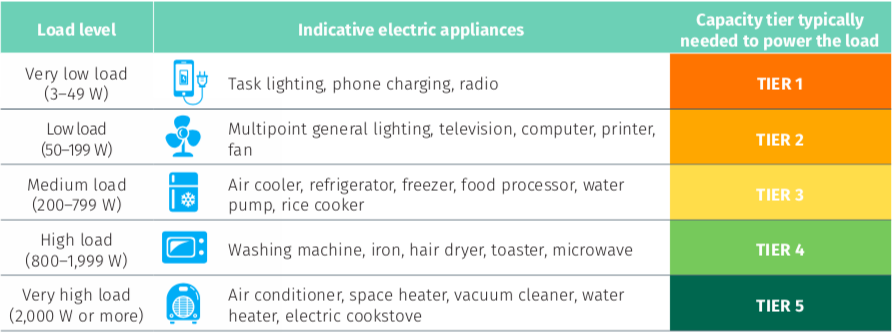

In [181]:
Image('../images/capacity_tiers.png')

#### Appliances

We take the data from **Section L**. However, it seems that there is some mismatch between id of items in the questionnaires (up to 70) and in the dataset.

In particular, the maximum item entered in the dataset is 61, while the maximum ID is 73. Since TVs are the last, it is unlikely that no households own a TV/radio. 

Probably, they recorded from 1 to 61 the items with a non-zero. As an alternative, we can try to remove 12 from the ID.

In [182]:
appliances_items = []
appliances_amount = []

for i in range(0,len(main)):
    hhid = main['Household Identification'][i]
    a = section_L.loc[section_L["HHID"]==hhid]
    items = []
    amount = []
    for index,row in a.iterrows():
        if row["La"]>0:
            items.append(row["Item"]+12)
            amount.append(row["La"])
    appliances_items.append(items)
    appliances_amount.append(amount)

appliances = pd.DataFrame.from_dict({"items": appliances_items,"amount":appliances_amount} )

In [183]:
appliances.head()

,items,amount
0,[68.0],[1.0]
1,[68.0],[1.0]
2,"[63.0, 15.0, 68.0, 14.0, 47.0, 70.0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
3,[],[]
4,[39.0],[1.0]


In [184]:
# following the Wwanda report, table 1, we have created a map between tier and appliance (code)
file1 = open(DATA_PATH + 'appliances_for_tiers.txt', 'r')
Lines = file1.readlines()
appliance_to_tier_mapping = {l[2:4]:l[0] for l in Lines}



In [202]:
E_capacity = []

for k in range(0,len(main)):
    if main[main_source_question][k]==8:
        E_capacity.append(0)
    elif main[main_source_question][k]==1:
        E_capacity.append(5)
    else:
        tier_tmp = []
        for i in appliances["items"][k]:
            if i>=33:
                tier_tmp.append( int(appliance_to_tier_mapping[str(int(i))]))
    
        if len(tier_tmp)==0:
            E_capacity.append(0)
        else:
            E_capacity.append(np.array(tier_tmp).max())
        
        

        
main['E_Capacity'] = E_capacity


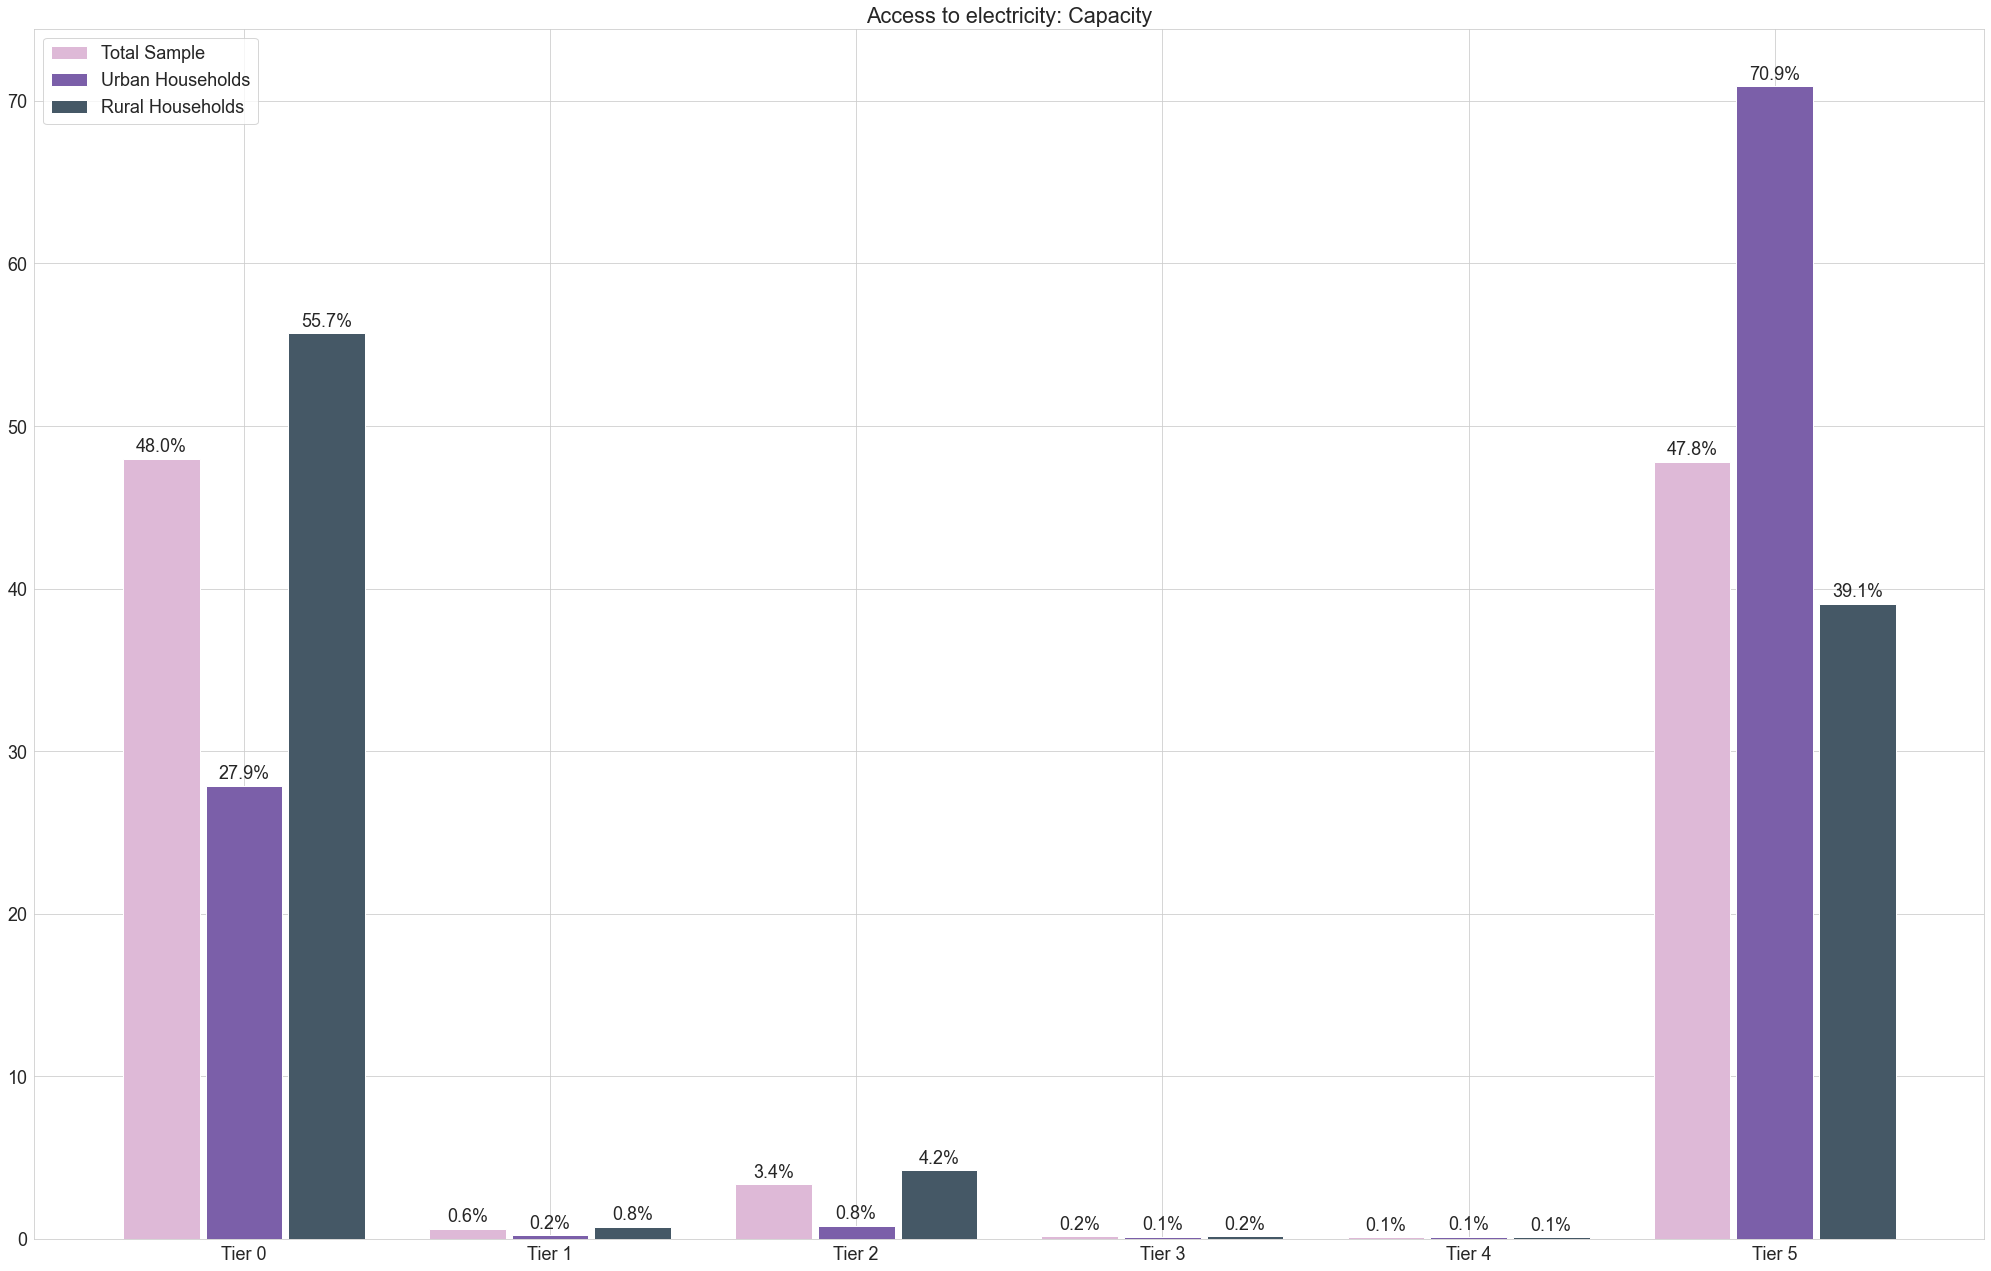

In [203]:
plot_tier_distribution(main,'E_capacity',values= [0,1,2,3,4,5],
                       labels = ['Tier 0', 'Tier 1', 'Tier 2','Tier 3','Tier 4',  'Tier 5' ],
                       title='Access to electricity: Capacity')

### MTF Electricity Access Index

We can compute the access index taking the minimum over all attributes.


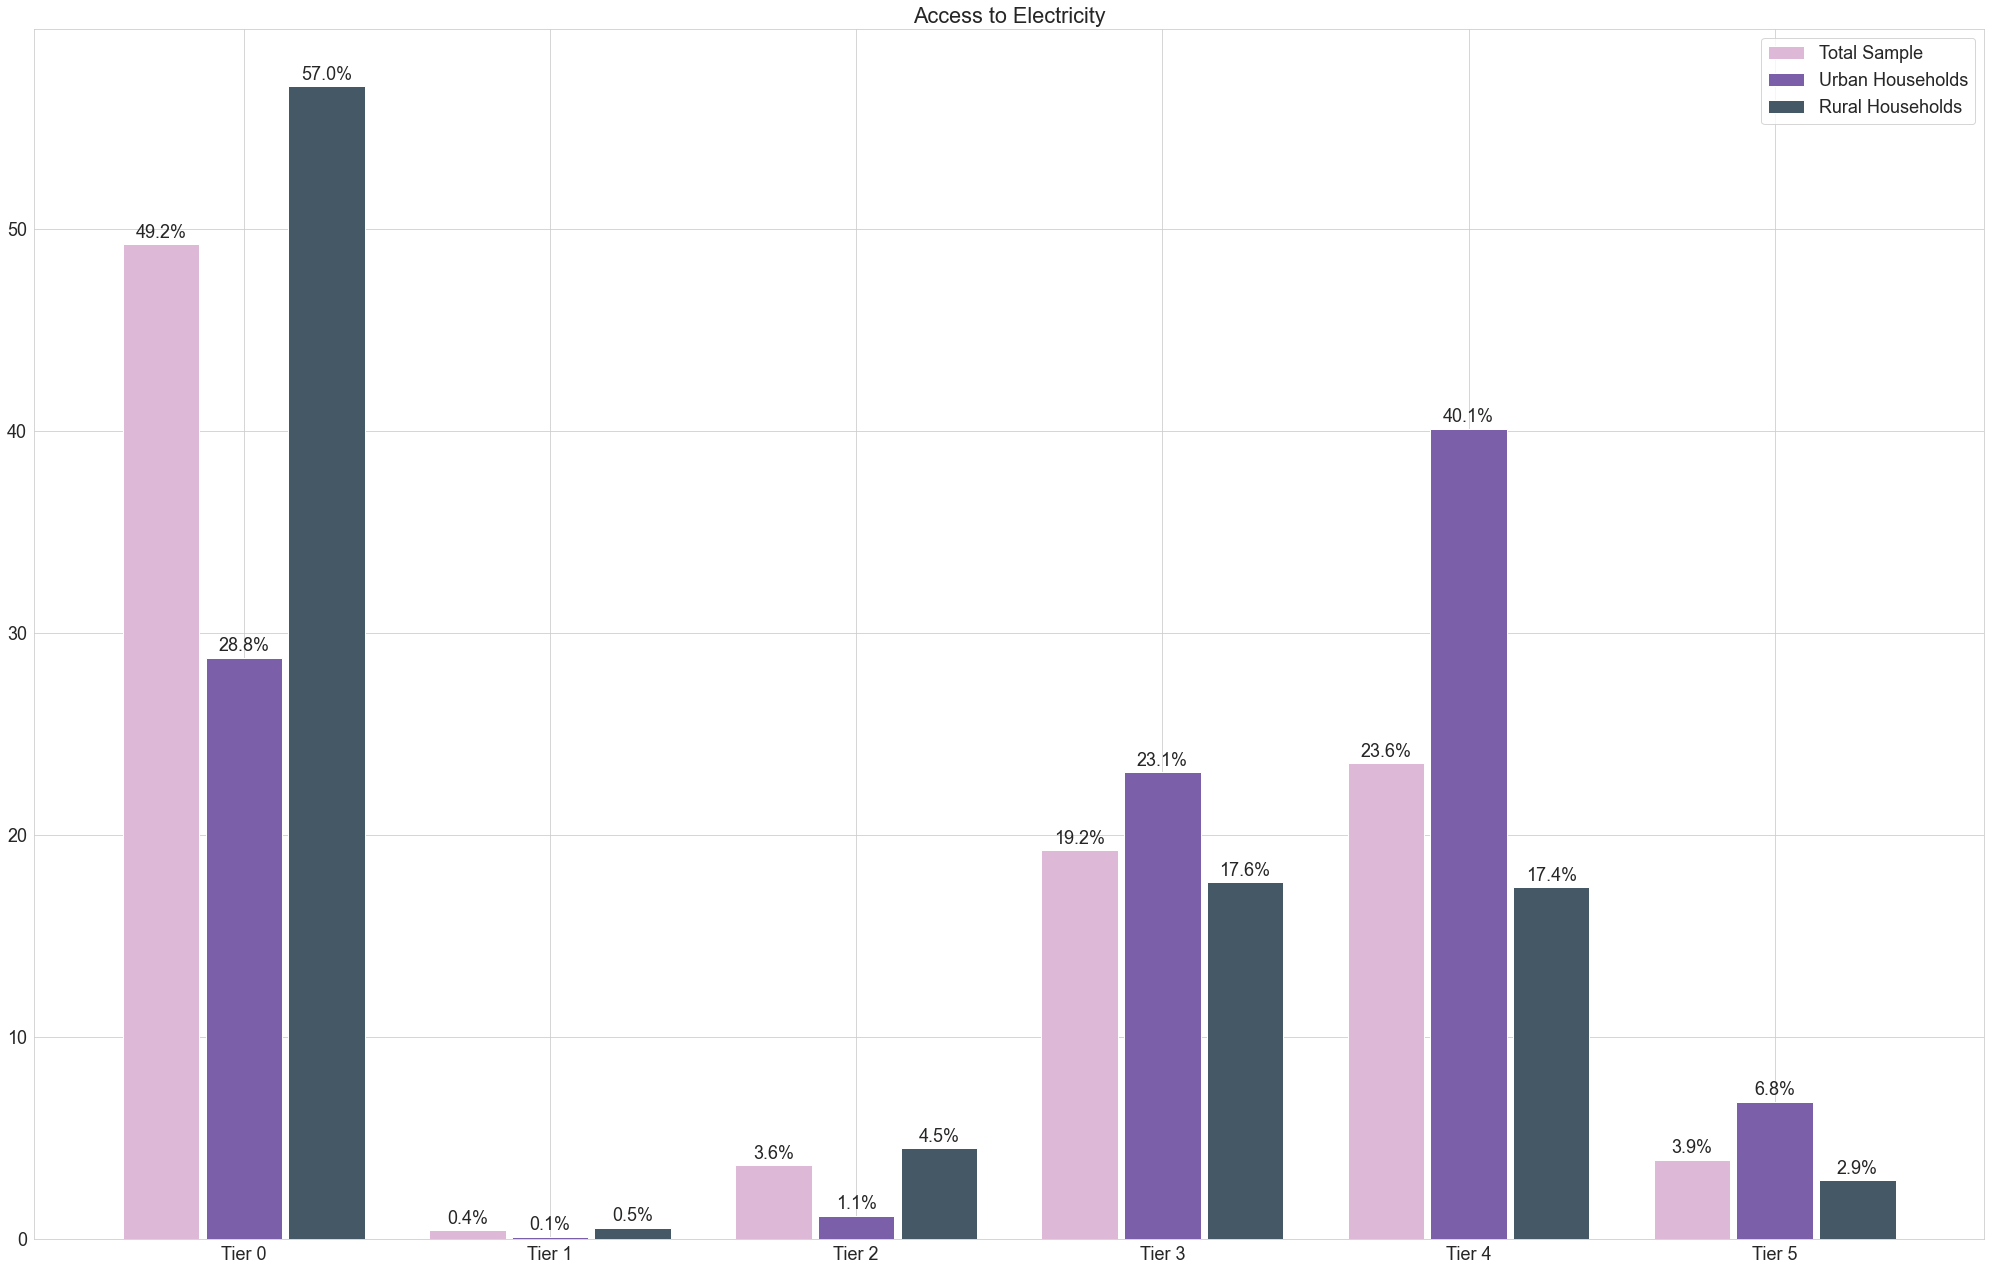

In [204]:
E_Index = []
for item,row in main.iterrows():
    E_Index.append(min(row["E_Capacity"],row["E_Formality"],row["E_Availability"],row["E_Quality"],
                      row["E_Reliability"],row["E_Safety"]))
main["E_Index"] = E_Index

values = []

for k in range(0,6):
    values.append(len(main.loc[main["E_Index"]==k]))

plot_tier_distribution(main,'E_Index',values= [0,1,2,3,4,5],
                       labels = ['Tier 0', 'Tier 1', 'Tier 2','Tier 3','Tier 4',  'Tier 5' ],
                       title='Access to Electricity')

In [53]:
question_capacity = {
    "National Grid": 'C2_household connected to the national grid',
    "Local Mini Grid": 'C64_In the last month how much electricity did your household use',
    "Generator": 'C88_What is the capacity of the generator',
    "Rechargeable Battery": {
            'Capacity': { 
                        'a': "C119a_capacity of the first rechargeable battery",
                        'b': 'C119b_capacity of the second rechargeable battery',
                        'c': "C119c_capacity of the third rechargeable battery",
                        'd': "C119d_capacity of the forth rechargeable battery",
                        },

             'Voltage': {
                        'a': "C120a_voltage of the first rechargeable battery",
                        'b': 'C120b_voltage of the second rechargeable battery',
                        'c': "C120c_voltage of the third rechargeable battery",
                        'd': "C120d_voltage of the fourth rechargeable battery",
                         },
             },
    "Pico-Hydro": {
                   'Lighting': "C133_1_Lighting",
                   'Appliances': 'C133_2_Appliances',
                   'Home-based income': "C133_3_Home-based income activity",
                 },
}

______________________________

Not sure whether the other calculations are correct

In [60]:
E_capacity_tier = []

for index,row in main.iterrows():
    #if row[main_source_question] == 1:
    if row[question_capacity["National Grid"]] == 1:
        # Directly Tier 5 if it is national grid 
        E_capacity_tier.append(5)
        
    elif row[main_source_question] == 2 or row[main_source_question] == 6:
        
        if row[main_source_question] == 2:
            # Convert kWh to Wh, then divide by 30 to have daily capacity and not monthly.
            Wh = 1000*row[question_capacity["Local Mini Grid"]]/30
        else:
            Ah_a = row[question_capacity["Rechargeable Battery"]['Capacity']['a']]
            Ah_b = row[question_capacity["Rechargeable Battery"]['Capacity']['b']]
            Ah_c = row[question_capacity["Rechargeable Battery"]['Capacity']['c']]
            Ah_d = row[question_capacity["Rechargeable Battery"]['Capacity']['d']]
            V_a = row[question_capacity["Rechargeable Battery"]['Voltage']['a']]
            V_b = row[question_capacity["Rechargeable Battery"]['Voltage']['b']]
            V_c = row[question_capacity["Rechargeable Battery"]['Voltage']['c']]
            V_d = row[question_capacity["Rechargeable Battery"]['Voltage']['d']]
            # We have to convert Ah to Wh 
            Wh = Ah_a*V_a + Ah_b*V_b + Ah_c*V_c + Ah_d*V_d 
            
        if Wh < 12:
            E_capacity_tier.append(0)            
        elif Wh >= 12 and Wh < 200:
            E_capacity_tier.append(1)            
        elif Wh >= 200 and Wh < 1000:
            E_capacity_tier.append(2)            
        elif Wh >= 1000 and Wh < 3400:
            E_capacity_tier.append(3)       
        elif Wh >= 3400 and Wh < 8200:
            E_capacity_tier.append(4)            
        elif Wh >= 8200:
            E_capacity_tier.append(5)            
        else:
            E_capacity_tier.append(np.nan)
                
    elif row[main_source_question] == 3:
        #Convert from kW to W
        W = 1000*row[question_capacity["Generator"]]
        if W < 3:
            E_capacity_tier.append(0)
        elif W >= 3 and W < 50:
            E_capacity_tier.append(1)
        elif W >= 3 and W < 50:
            E_capacity_tier.append(2)
        elif W >= 50 and W < 200:
            E_capacity_tier.append(3)
        elif W >= 200 and W < 800:
            E_capacity_tier.append(4)
        elif W >= 800 and W < 2000:
            E_capacity_tier.append(5)
        else:
            E_capacity_tier.append(np.nan)
            
    elif row[main_source_question] == 7:  
        if row[question_capacity["Pico-Hydro"]['Lighting']] == 1.0:
            E_capacity_tier.append(1)
        elif row[question_capacity["Pico-Hydro"]['Appliances']] == 1.0:
            E_capacity_tier.append(3)
        elif row[question_capacity["Pico-Hydro"]['Home-based income']] == 1.0:
            E_capacity_tier.append(4)
        else:
            E_capacity_tier.append(np.nan)  
    else:
        E_capacity_tier.append(np.nan)
            

        
        
main['E_capacity'] = E_capacity_tier



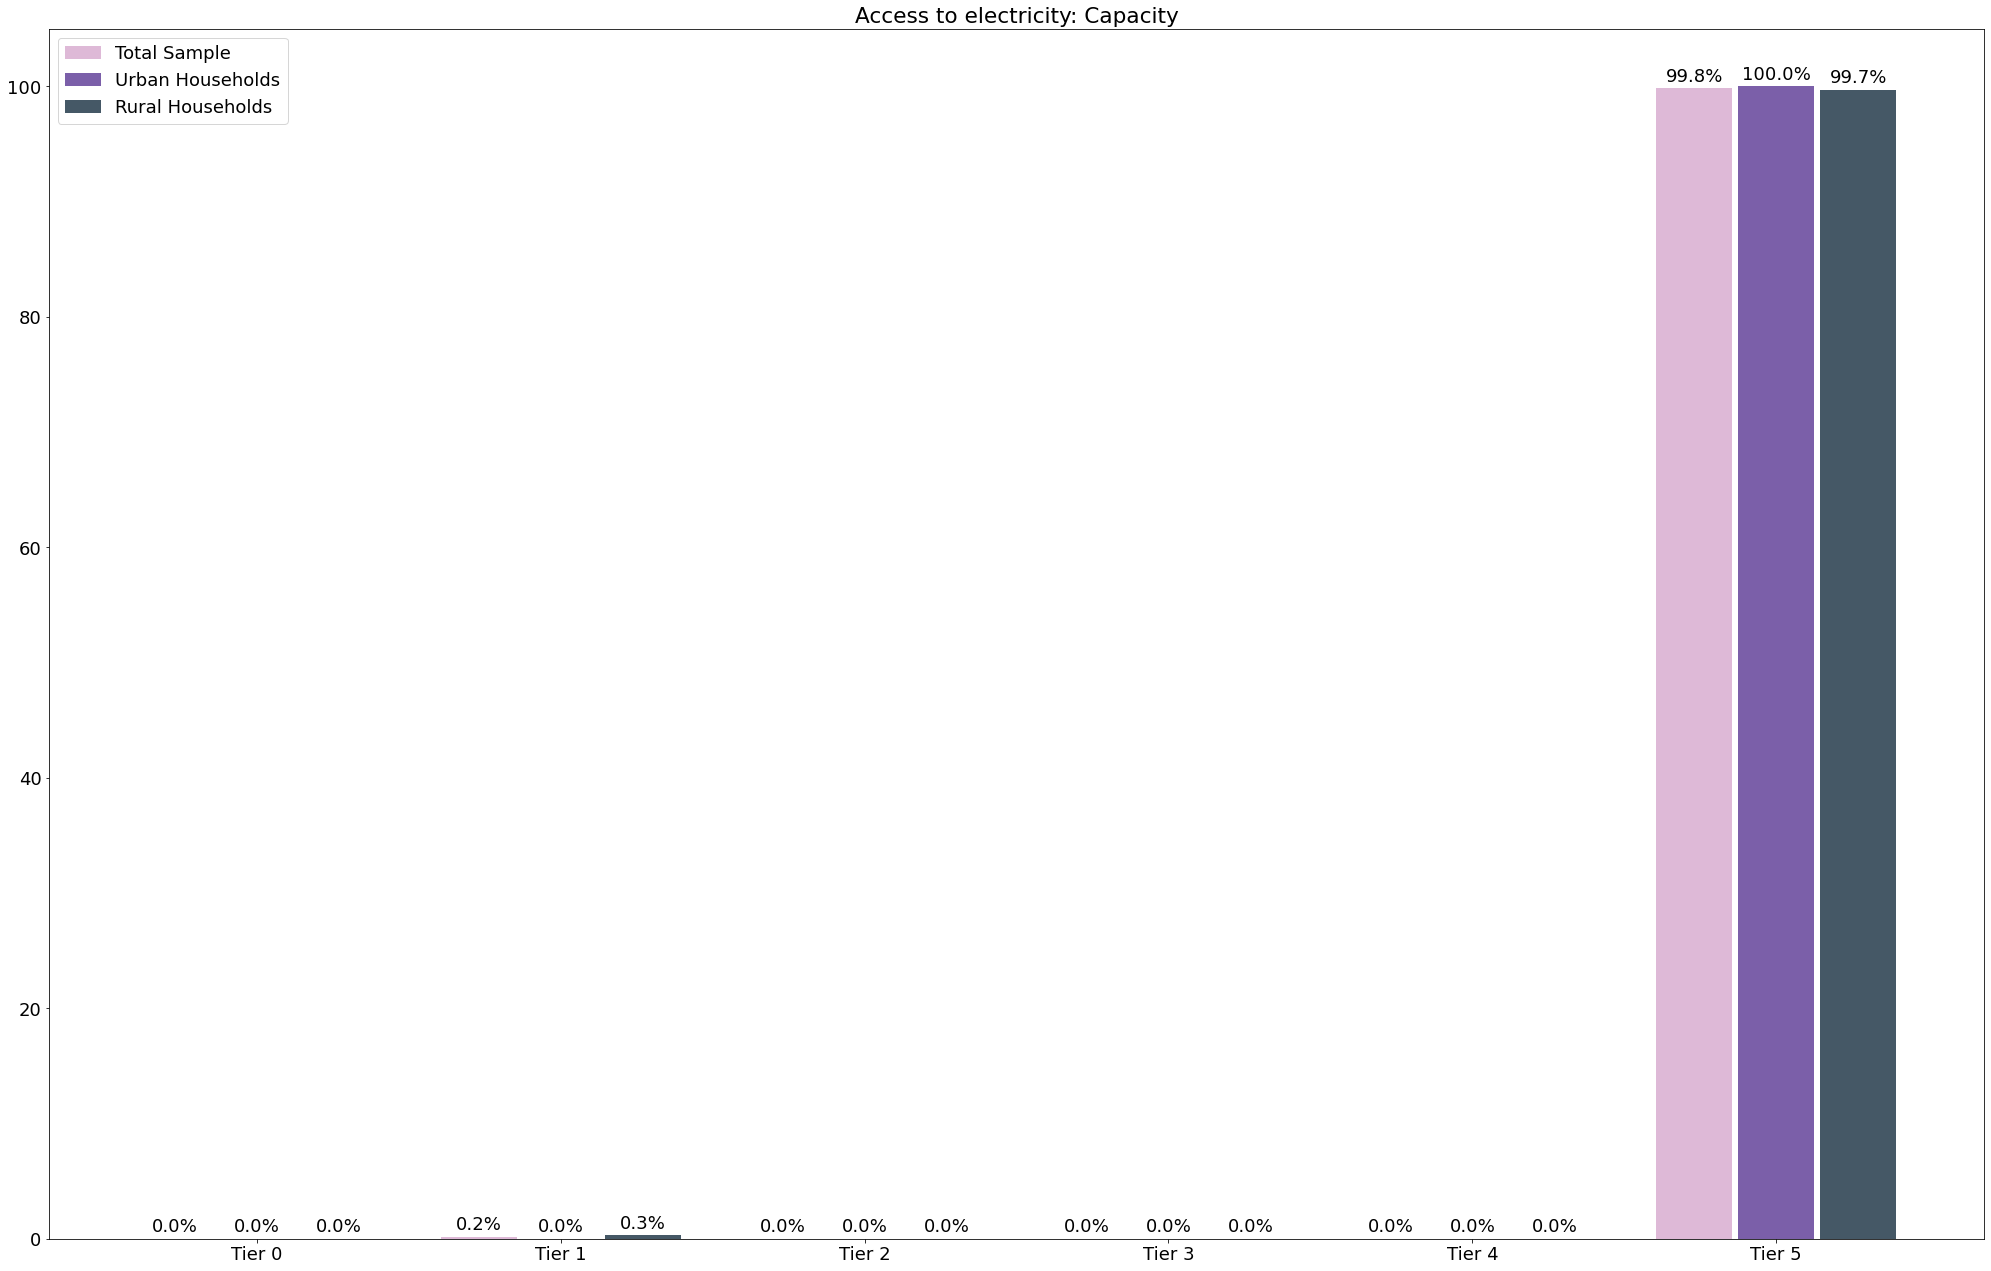

In [61]:
plot_tier_distribution(main,'E_capacity',values= [0,1,2,3,4,5],
                       labels = ['Tier 0', 'Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5' ],
                       title='Access to electricity: Capacity')


##### Comments about the conversion:

Divide local mini grid by 30 (because monthly kWh, we need daily)

Generator: kW

Rechargeable Battery : Ah. convert Ah to Wh. Formula: (Ah)*(V)

Solar Home system: Ah. convert Ah to Wh. Formula: (Ah)*(V)



In [67]:
import collections
print(collections.Counter(E_capacity_tier))

Counter({nan: 1656, 5: 1636, 1: 3})
